In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [2]:
file_path = r"C:\Users\danad\Desktop\depression_dataset_cleaned.csv"
df = pd.read_csv(file_path)


In [3]:
numeric_cols = df.select_dtypes(include=['number']).columns
X = df[numeric_cols].drop(columns=['Depression'], errors='ignore')
y = df['Depression']

In [4]:
counts_before = y.value_counts()


In [5]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [6]:
counts_after = y_res.value_counts()

In [9]:
print("counts_before :",counts_after)
print("counts_after :",counts_before)

counts_before : Depression
1.0    16336
0.0    16336
Name: count, dtype: int64
counts_after : Depression
1.0    16336
0.0    11565
Name: count, dtype: int64


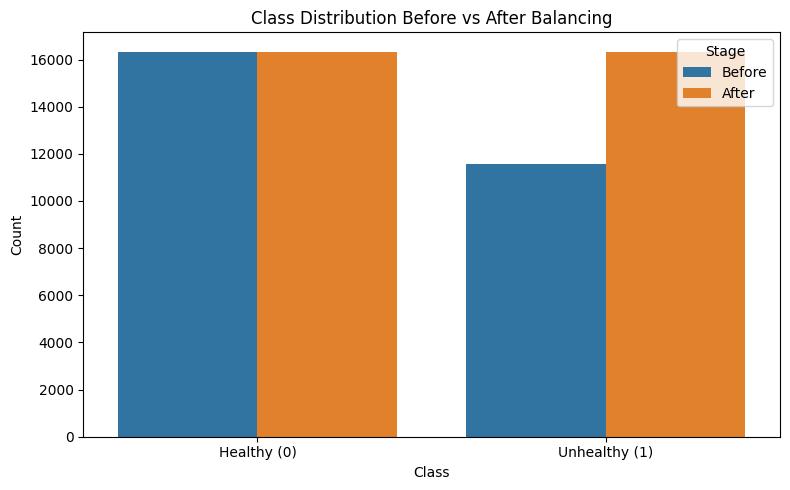

✅ Balanced dataset saved at: C:\Users\danad\Desktop\depression_dataset_balanced.csv
✅ Box plots saved at Desktop as boxplot_before.png, boxplot_after.png, class_distribution.png


In [10]:
plt.figure(figsize=(8,5))

# Create a dataframe for comparison
count_df = pd.DataFrame({
    "Class": ["Healthy (0)", "Unhealthy (1)"],
    "Before": counts_before.values,
    "After": counts_after.values
})

count_df_melt = count_df.melt(id_vars="Class", value_vars=["Before","After"], 
                              var_name="Stage", value_name="Count")

sns.barplot(data=count_df_melt, x="Class", y="Count", hue="Stage")
plt.title("Class Distribution Before vs After Balancing")
plt.tight_layout()
plt.savefig(r"C:\Users\danad\Desktop\class_distribution.png")
plt.show()

print("✅ Balanced dataset saved at: C:\\Users\\danad\\Desktop\\depression_dataset_balanced.csv")
print("✅ Box plots saved at Desktop as boxplot_before.png, boxplot_after.png, class_distribution.png")